# aws_cloud

## 데이터 확인

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
cloud = pd.read_csv('../data/weather/raw/aws_cloud.csv')
cloud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         139818 non-null  int64  
 1   tma                139818 non-null  object 
 2   stn_id             139818 non-null  int64  
 3   avg_tca            84257 non-null   float64
 4   avg_tca_qcflg      0 non-null       float64
 5   avg_tca_crob       0 non-null       float64
 6   avg_tca_calc_dtnb  139818 non-null  int64  
 7   avg_tca_srv_yn     0 non-null       float64
 8   orgn_stn_id        0 non-null       float64
dtypes: float64(5), int64(3), object(1)
memory usage: 9.6+ MB


In [76]:
cloud.head()

,Unnamed: 0,tma,stn_id,avg_tca,avg_tca_qcflg,avg_tca_crob,avg_tca_calc_dtnb,avg_tca_srv_yn,orgn_stn_id
0,1,2016-04-01 20:00:00.0,637,0.0,NaN,NaN,70,NaN,NaN
1,2,2016-04-02 14:00:00.0,637,0.0,NaN,NaN,70,NaN,NaN
2,3,2016-04-03 08:00:00.0,637,0.0,NaN,NaN,70,NaN,NaN
3,4,2016-04-04 00:00:00.0,616,0.0,NaN,NaN,70,NaN,NaN
4,5,2016-04-04 23:00:00.0,515,0.0,NaN,NaN,70,NaN,NaN


In [77]:
cloud.isnull().sum()

Unnamed: 0                0
tma                       0
stn_id                    0
avg_tca               55561
avg_tca_qcflg        139818
avg_tca_crob         139818
avg_tca_calc_dtnb         0
avg_tca_srv_yn       139818
orgn_stn_id          139818
dtype: int64

## 컬럼 정리

In [78]:
cloud = cloud.drop(columns=['Unnamed: 0', 'avg_tca_qcflg', 'avg_tca_crob', 'avg_tca_srv_yn', 'orgn_stn_id'])
cloud.columns

Index(['tma', 'stn_id', 'avg_tca', 'avg_tca_calc_dtnb'], dtype='object')

In [79]:
cloud.head()

,tma,stn_id,avg_tca,avg_tca_calc_dtnb
0,2016-04-01 20:00:00.0,637,0.0,70
1,2016-04-02 14:00:00.0,637,0.0,70
2,2016-04-03 08:00:00.0,637,0.0,70
3,2016-04-04 00:00:00.0,616,0.0,70
4,2016-04-04 23:00:00.0,515,0.0,70


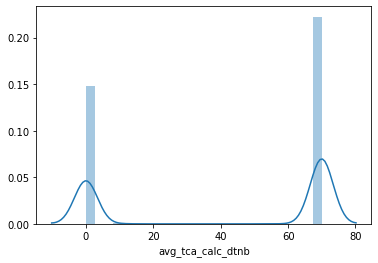

In [80]:
sns.distplot(cloud.avg_tca_calc_dtnb)

In [81]:
cloud[cloud.avg_tca_calc_dtnb == 0]

,tma,stn_id,avg_tca,avg_tca_calc_dtnb
47,2016-04-30 18:00:00.0,616,NaN,0
97,2016-06-03 13:00:00.0,616,NaN,0
212,2016-08-24 18:00:00.0,616,NaN,0
218,2016-08-29 12:00:00.0,616,NaN,0
239,2016-09-09 18:00:00.0,616,NaN,0
...,...,...,...,...
139813,2020-03-30 01:00:00.0,637,NaN,0
139814,2020-03-30 08:00:00.0,515,NaN,0
139815,2020-03-30 16:00:00.0,634,NaN,0
139816,2020-03-30 20:00:00.0,634,NaN,0


## 정렬

### to_datetime

In [82]:
cloud['tma'] = pd.to_datetime(cloud['tma'])
cloud.dtypes

tma                  datetime64[ns]
stn_id                        int64
avg_tca                     float64
avg_tca_calc_dtnb             int64
dtype: object

### 정렬 함수 만들기

In [83]:
def sort_by(data, colname):
    data = data.sort_values(by=colname)
    data = data.reset_index()
    del data['index']
    
    return data

In [84]:
cloud = sort_by(cloud, ['tma', 'stn_id'])
cloud.head()

,tma,stn_id,avg_tca,avg_tca_calc_dtnb
0,2016-04-01 00:00:00,515,0.0,70
1,2016-04-01 00:00:00,616,NaN,0
2,2016-04-01 00:00:00,634,0.0,70
3,2016-04-01 00:00:00,637,0.0,70
4,2016-04-01 01:00:00,515,0.0,70


## 결측치 & 이상치 처리

In [85]:
cloud.tail()

,tma,stn_id,avg_tca,avg_tca_calc_dtnb
139813,2020-03-31 22:00:00,637,NaN,0
139814,2020-03-31 23:00:00,515,NaN,0
139815,2020-03-31 23:00:00,616,NaN,0
139816,2020-03-31 23:00:00,634,NaN,0
139817,2020-03-31 23:00:00,637,NaN,0


In [86]:
cloud.avg_tca.value_counts().sort_values()

 2.6         1
 2.4         1
 2.8         1
-59.4        1
 3.1         1
 3.2         1
 2.9         1
 3.3         1
 2.2         1
 3.8         2
 2.1         3
 1.6         4
 1.8         4
 0.9         5
 0.8         5
 0.4         5
 2.3         5
 2.0         5
 1.9         6
 0.5         6
 1.2         6
 1.0         6
 1.7         7
 1.3         7
 1.5         8
 1.4        11
 1.1        13
 0.7        14
 0.3        14
 0.6        17
 0.1        17
 0.2        22
 0.0     84056
Name: avg_tca, dtype: int64

-59.4 이상치: 평균 전운량 평균으로 대체

In [87]:
cloud.avg_tca.mean()

0.0016995620541913428

In [88]:
cloud.loc[cloud.avg_tca==-59.4, 'avg_tca'] = cloud.avg_tca.mean()

In [89]:
cloud.avg_tca.value_counts().sort_values()

3.2000        1
0.0017        1
3.3000        1
2.9000        1
2.6000        1
2.8000        1
2.2000        1
2.4000        1
3.1000        1
3.8000        2
2.1000        3
1.6000        4
1.8000        4
0.4000        5
2.0000        5
2.3000        5
0.9000        5
0.8000        5
0.5000        6
1.9000        6
1.0000        6
1.2000        6
1.7000        7
1.3000        7
1.5000        8
1.4000       11
1.1000       13
0.7000       14
0.3000       14
0.1000       17
0.6000       17
0.2000       22
0.0000    84056
Name: avg_tca, dtype: int64

In [90]:
cloud.isnull().sum()

tma                      0
stn_id                   0
avg_tca              55561
avg_tca_calc_dtnb        0
dtype: int64

In [91]:
cloud = cloud.fillna(0)
cloud.isnull().sum()

tma                  0
stn_id               0
avg_tca              0
avg_tca_calc_dtnb    0
dtype: int64